In [4]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [121]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [181]:
df['age_y'] = df['age']/365.25

In [182]:
df['age_m'] = df['age']/365.25*12

In [182]:
df['age_y'] = df['age_y'].round()

In [184]:
df['age_m'] = df['age_m'].round()

In [183]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

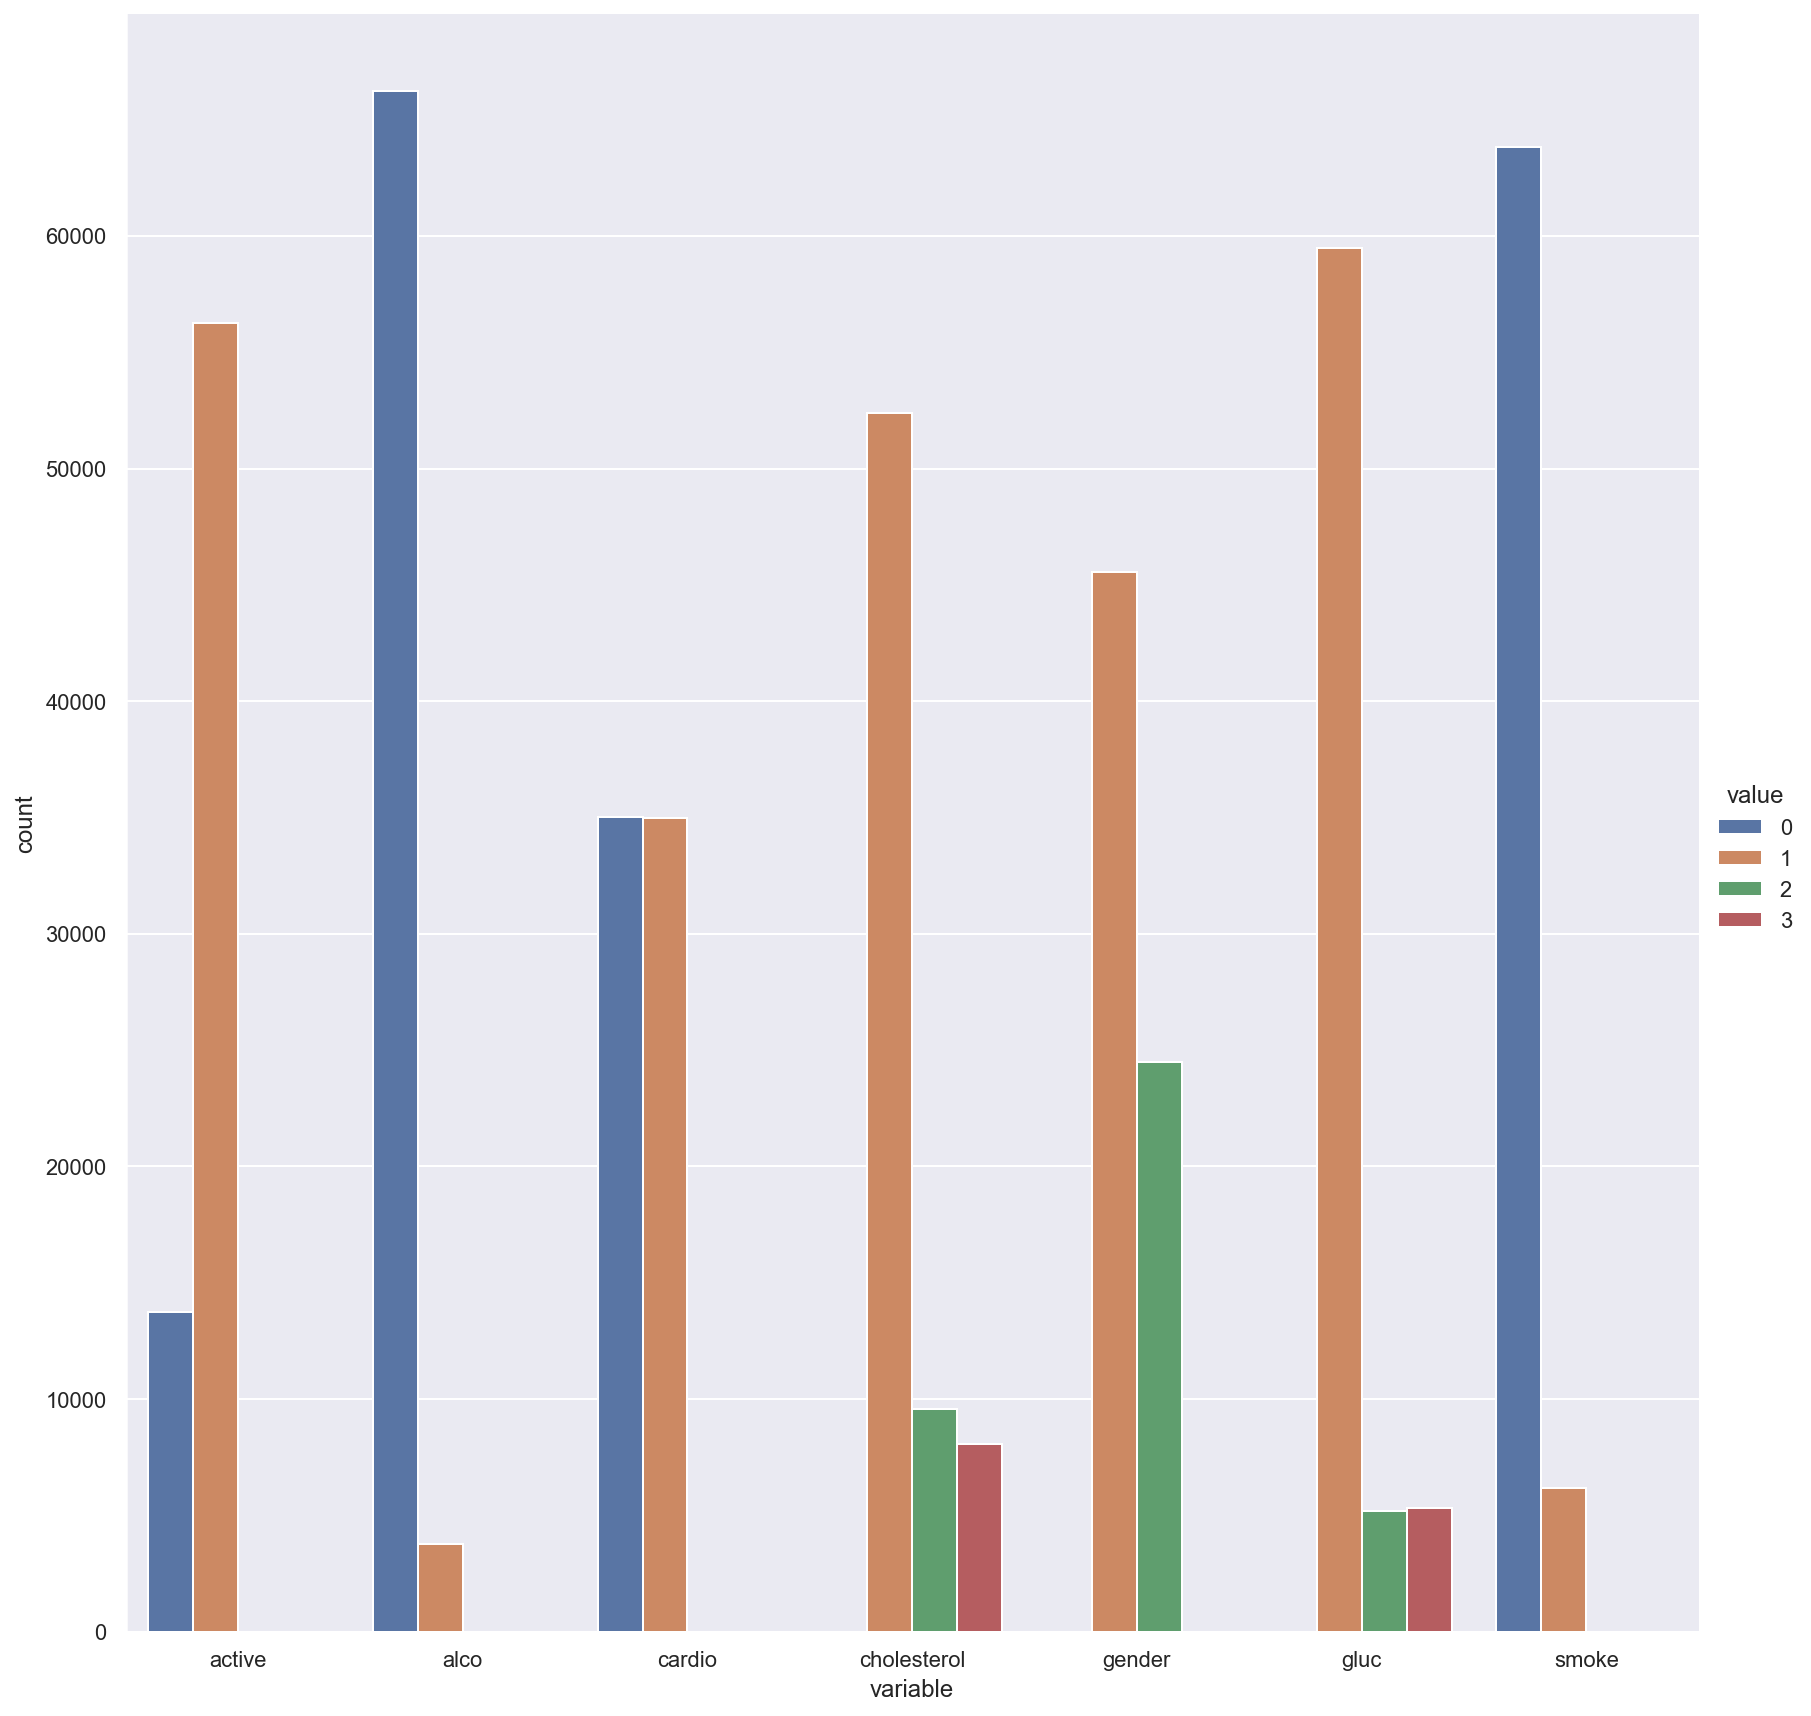

In [12]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

In [20]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)

In [21]:
df_uniques

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


In [22]:
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

In [23]:
df_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


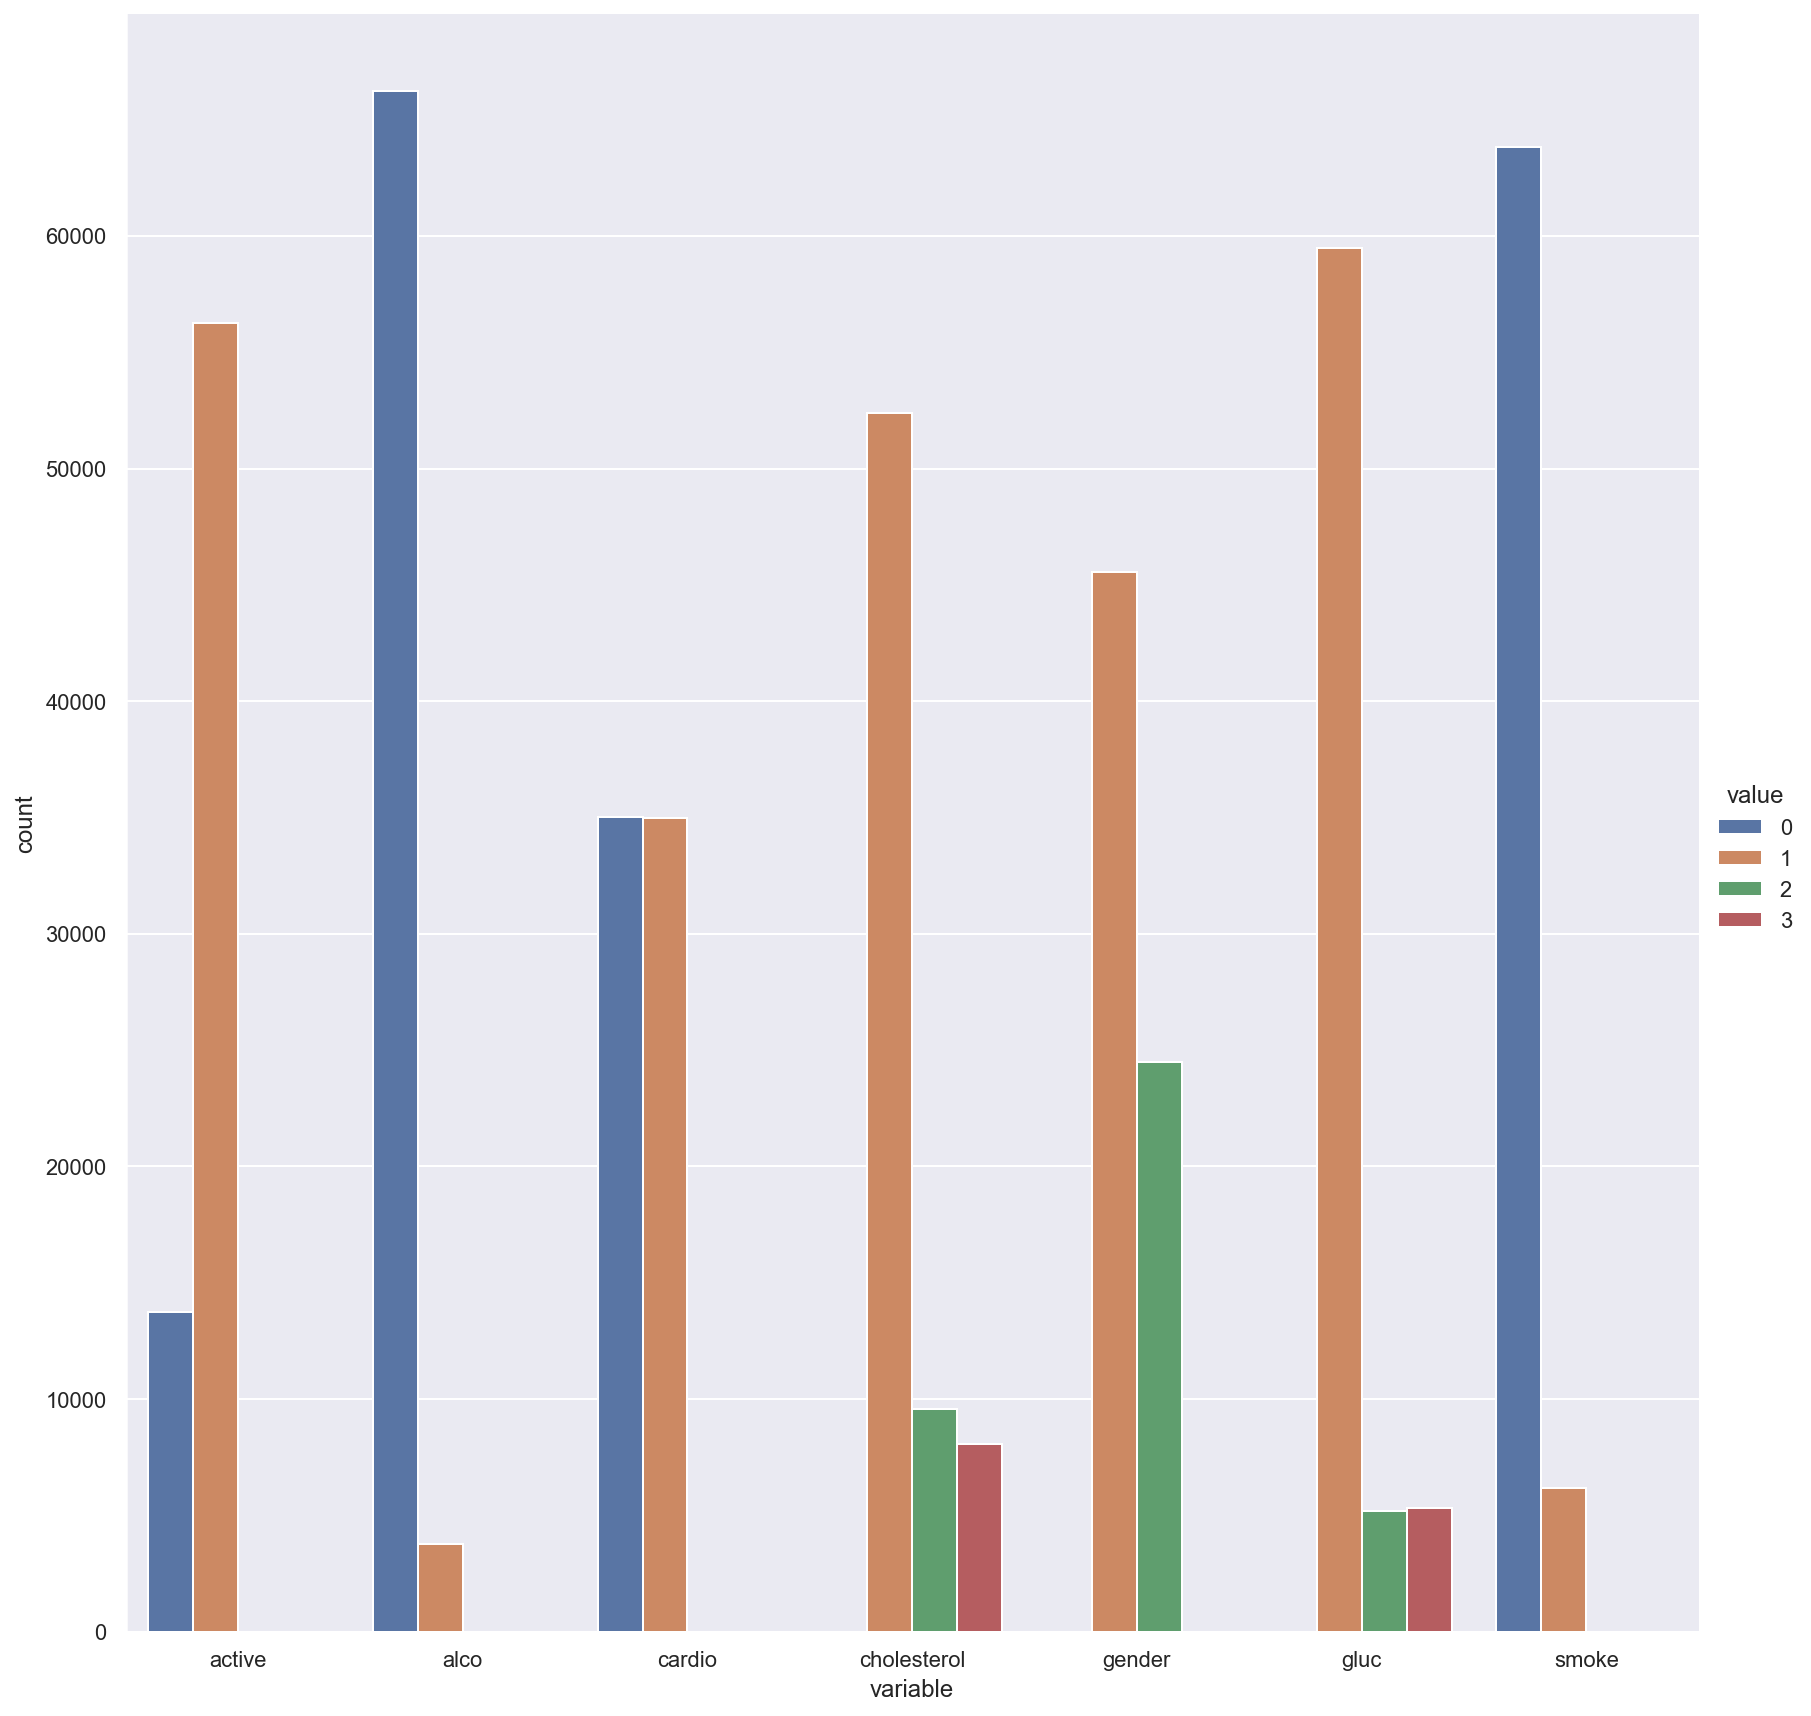

In [24]:
sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

<AxesSubplot:xlabel='gluc', ylabel='Count'>

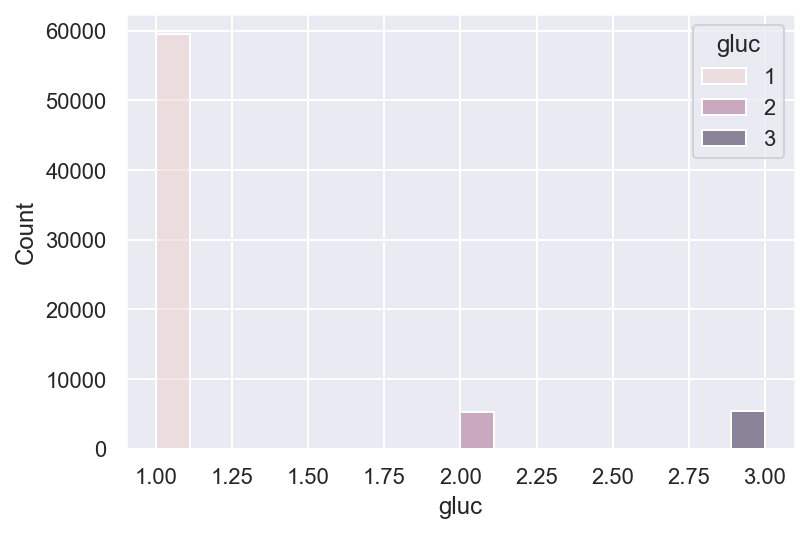

In [33]:
sns.histplot(x="gluc", hue="gluc", data=df)


In [42]:
unique_df = pd.melt(frame=df, value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],)

In [43]:
unique_df

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


In [63]:
unique_df1 = pd.DataFrame(unique_df.groupby(['variable', 'value'])['value'].count()).\
rename(columns={'value':'count'}).sort_index(level=[0, 1]).reset_index()

In [64]:
unique_df1

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


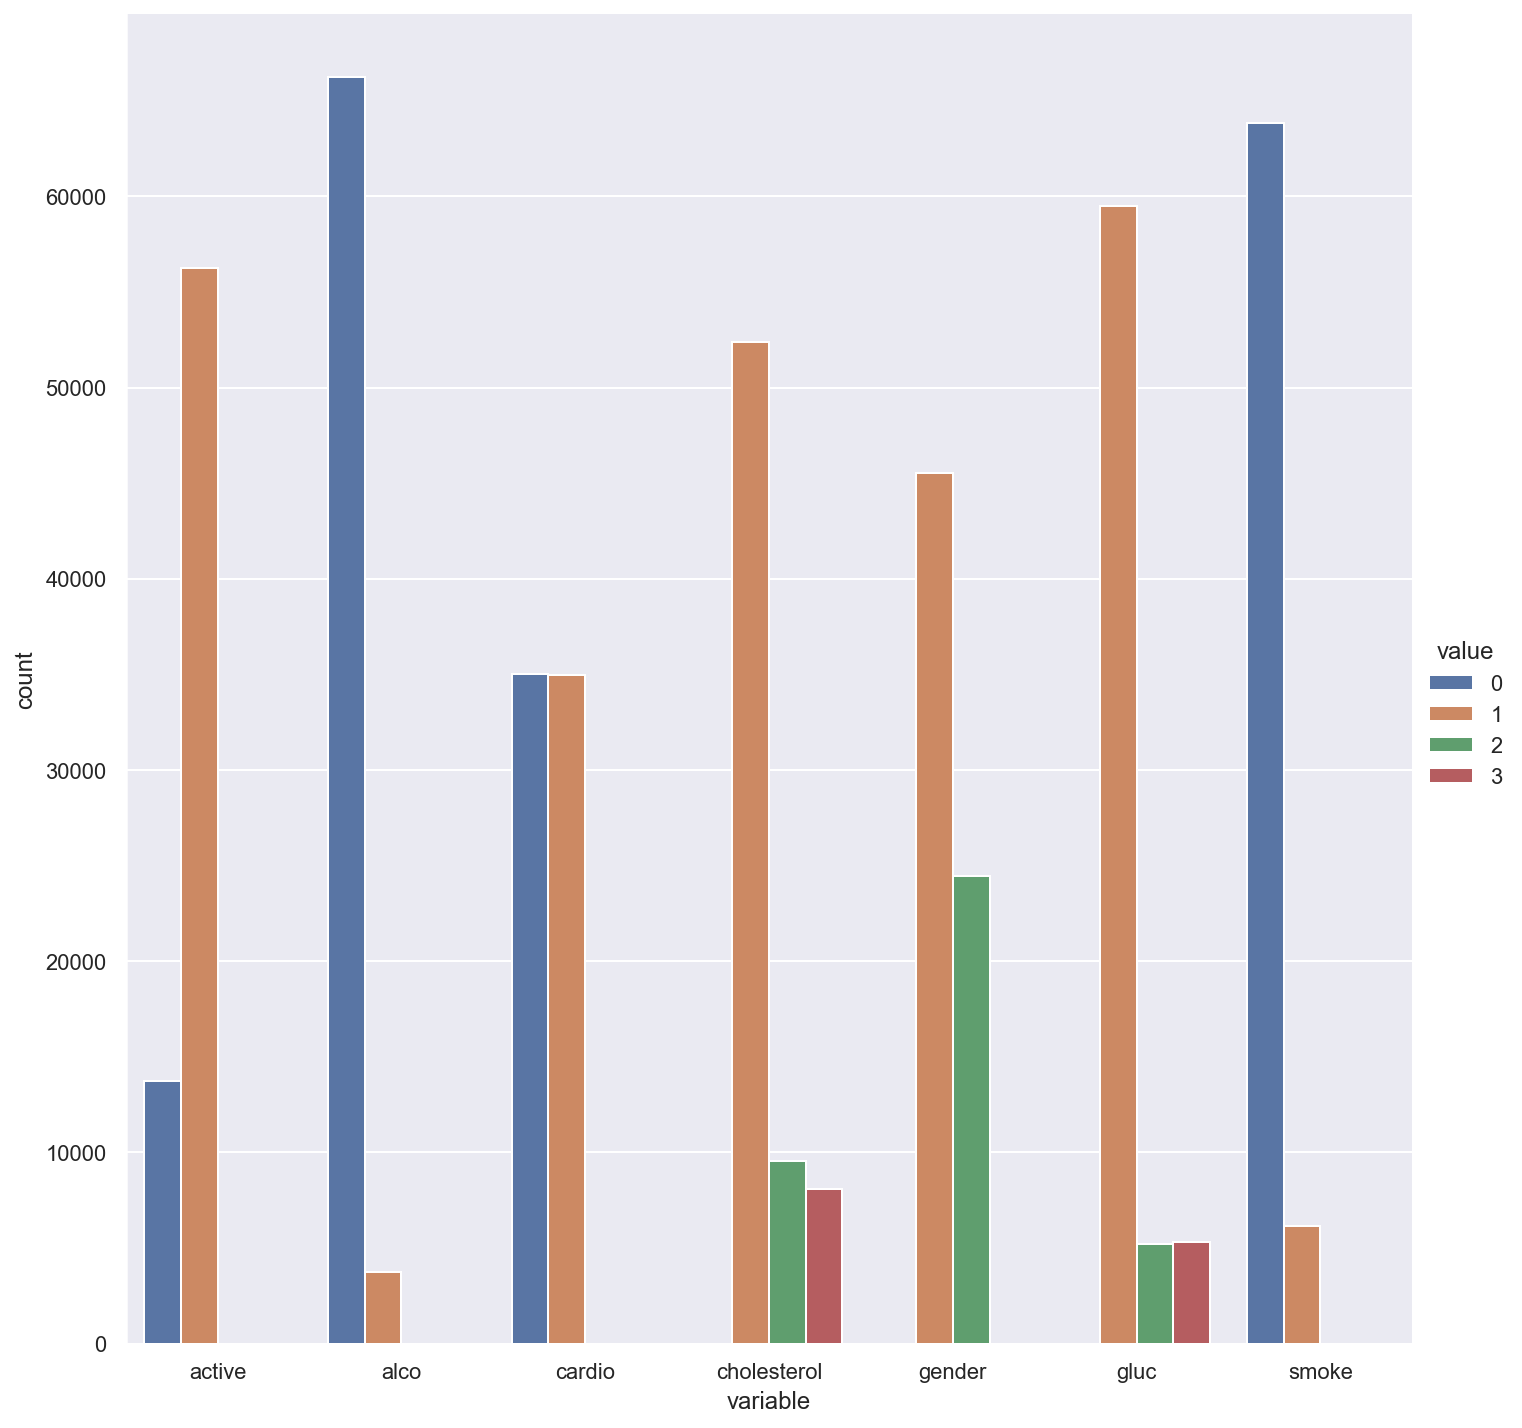

In [67]:
sns.factorplot(x='variable', y='count', hue='value', data=unique_df1, kind='bar', size=10)

In [68]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars = 'cardio'
)


In [69]:
df_uniques

,cardio,variable,value
0,0,gender,2
1,1,gender,1
2,1,gender,1
3,1,gender,2
4,0,gender,1
...,...,...,...
419995,0,active,1
419996,1,active,1
419997,1,active,0
419998,1,active,0


In [70]:
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["cardio","variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

In [71]:
df_uniques

,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,1,29330
5,0,cholesterol,2,3799
6,0,cholesterol,3,1892
7,0,gender,1,22914
8,0,gender,2,12107
9,0,gluc,1,30894


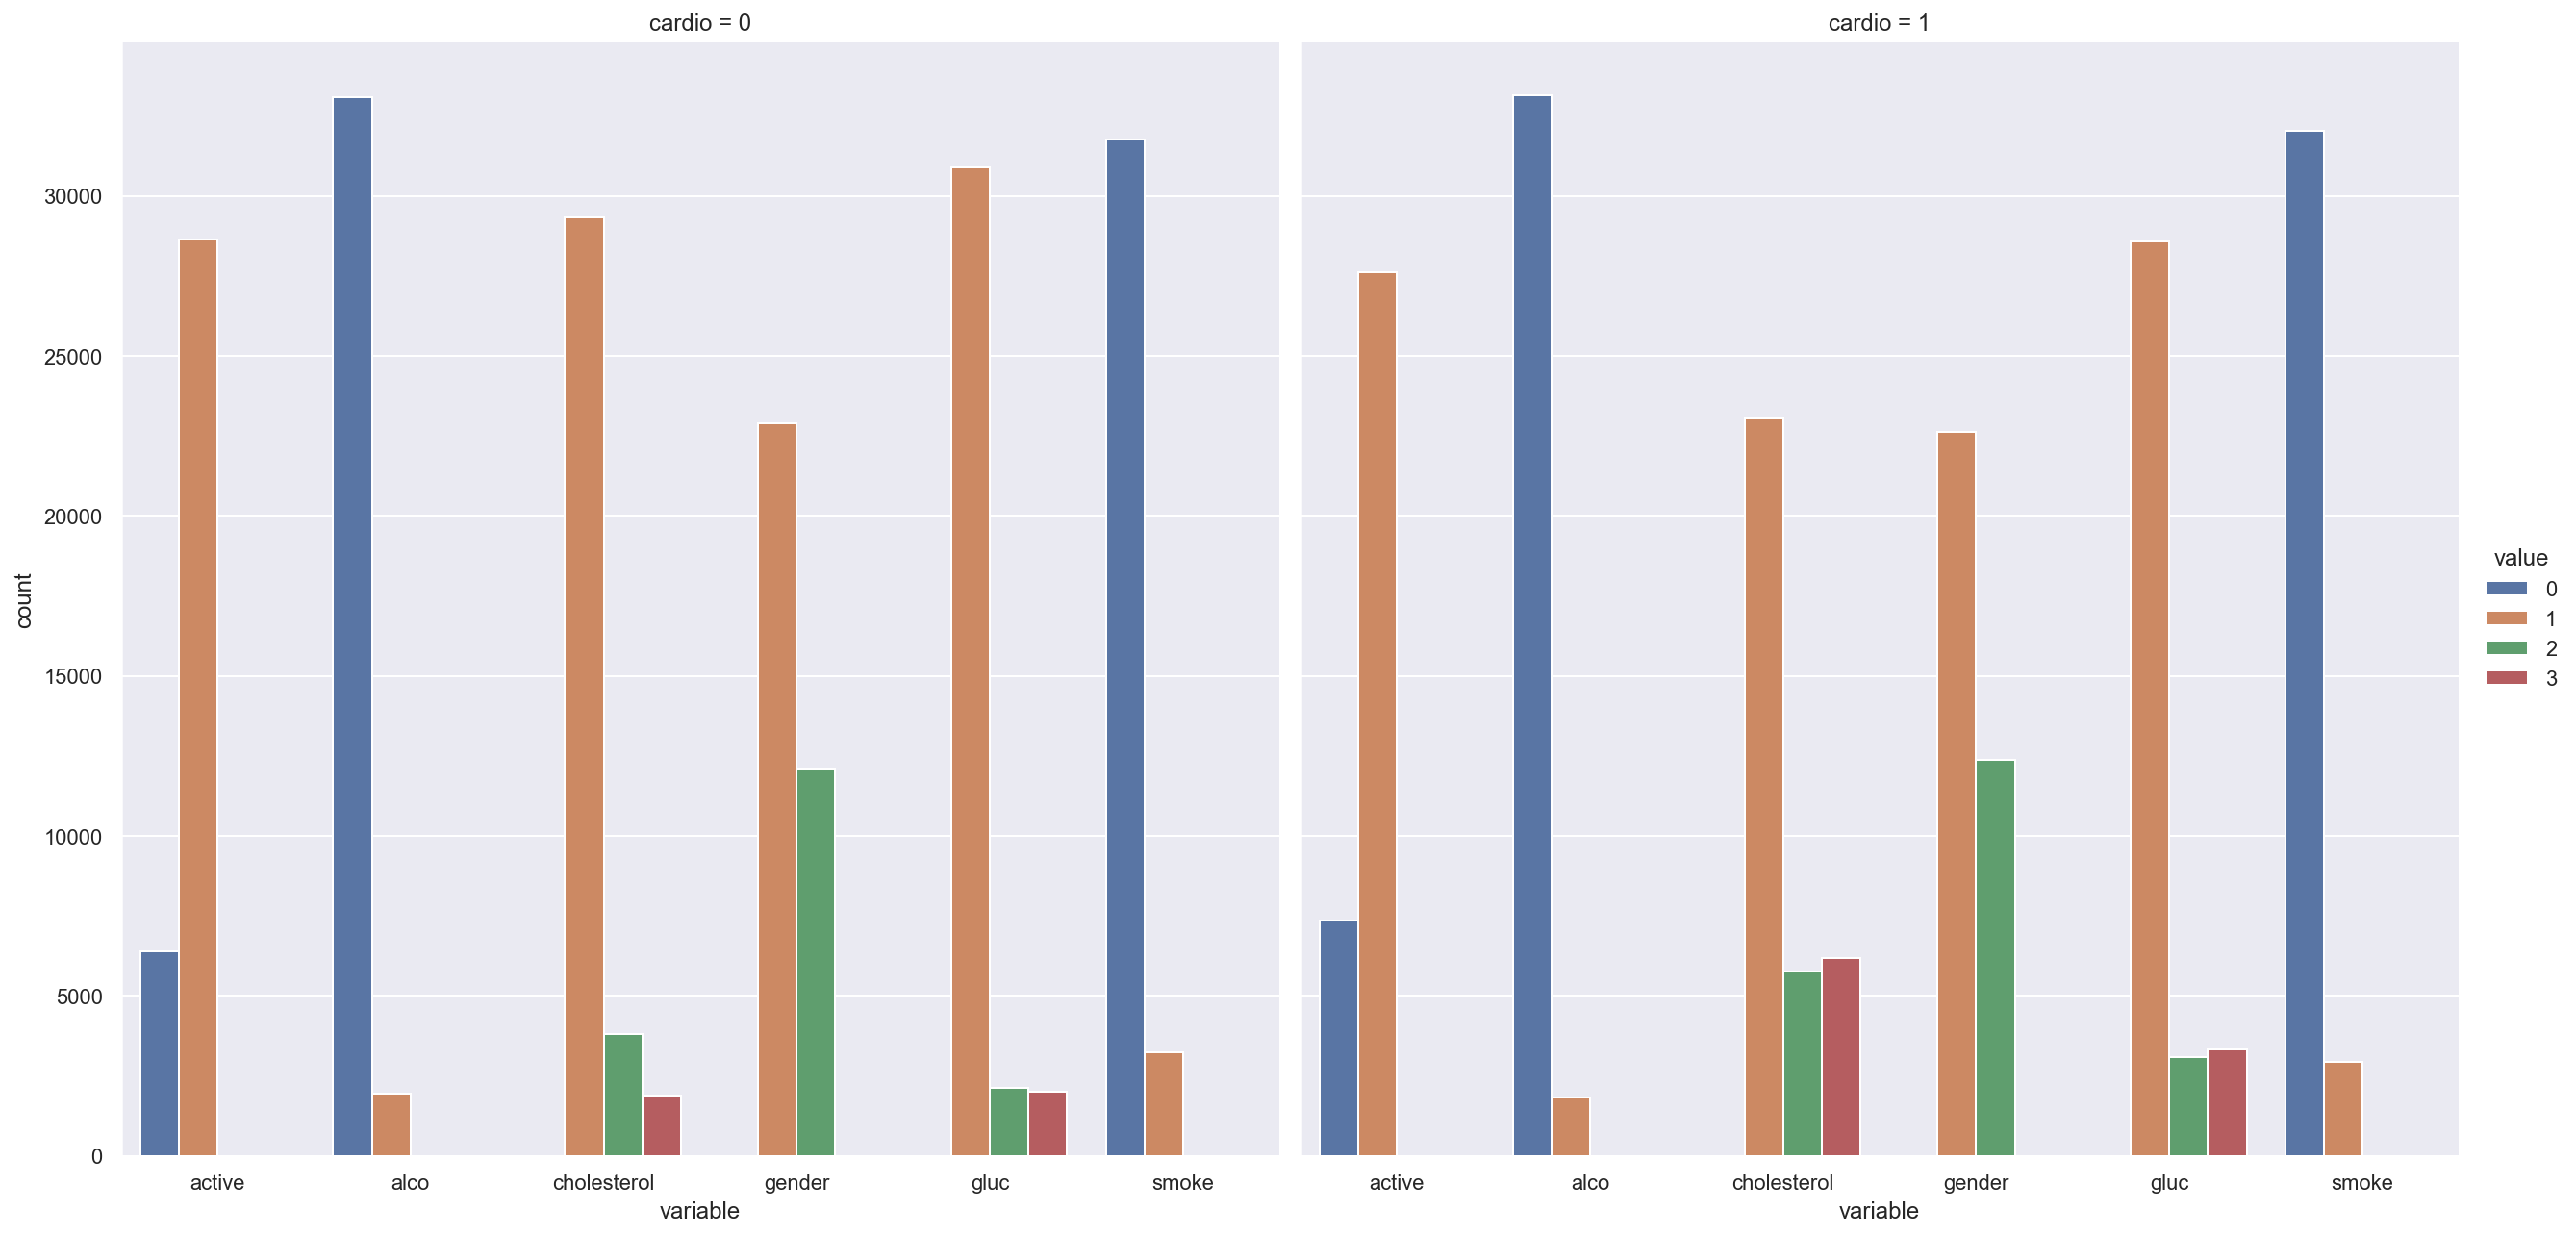

In [73]:
sns.factorplot(
    x="variable", y="count", hue="value", col='cardio', data=df_uniques, kind="bar", size=9
);

In [83]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## 1.1. Basic observations

### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.


1. __45530 women and 24470 men__
2. 45530 men and 24470 women
3. 45470 women and 24530 men
4. 45470 men and 24530 women

In [26]:
df.groupby('gender').agg({'height':'mean'})

,height
gender,
1,161.355612
2,169.947895


In [27]:
df['gender'] = df['gender'].map({1:"Women", 2:"Men"})

In [28]:
df['gender'].value_counts()

Women    45530
Men      24470
Name: gender, dtype: int64

### Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

1. women
2. __men__

In [96]:
df.alco.value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [97]:
df['alco'] = df['alco'].map({0:False, 1:True})

In [101]:
df[df['alco']==True].groupby('gender').count().alco

gender
Men      2603
Women    1161
Name: alco, dtype: int64

### Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

1. 4
2. 16
3. __20__
4. 24


In [111]:
Men = df.groupby("gender").count().smoke[0]
Women = df.groupby("gender").count().smoke[1]

In [113]:
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [114]:
df['smoke'] = df['smoke'].map({0:False, 1:True})

In [128]:
Men_Smoke = df[df['smoke']==True].groupby('gender').count().smoke[0]
Women_Smoke = df[df['smoke']==True].groupby('gender').count().smoke[1]

In [129]:
Men_Smoke_Percent = Men_Smoke * 100 / Men
Women_Smoke_Percent = Women_Smoke * 100 / Women

In [130]:
Men_Smoke_Percent

21.88802615447487

In [131]:
Women_Smoke_Percent

1.785635844498133

In [137]:
round(Men_Smoke_Percent - Women_Smoke_Percent)

20

### Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You’ll need to figure out the units of feature age in this dataset.

1. 5
2. 10
3. 15
4. __20__

In [186]:
median_age_smoke = df.groupby('smoke').agg({'age_m':'median'}).age_m[1]
median_age_no_smoke = df.groupby('smoke').agg({'age_m':'median'}).age_m[0]

In [187]:
median_age_smoke

628.0

In [188]:
median_age_no_smoke

648.0

In [189]:
abs(median_age_no_smoke-median_age_smoke)

20.0

Clarifications:

1. Calculate age_years feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.
2. Cholesterol level categories differ between the figure and our dataset. The conversion for the cholesterol feature is as follows: 4 mmol/l → 1, 5-7 mmol/l → 2, 8 mmol/l → 3.

In [9]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_y'],
      dtype='object')

In [11]:
df.cholesterol.head()

0    1
1    3
2    3
3    1
4    1
Name: cholesterol, dtype: int64

In [20]:
df[(df.age_y>=60) & (df.age_y<=64)]['age_y'].count()

15464

In [15]:
df.shape

(70000, 14)

In [17]:
df.age_y.max()

65.0

In [25]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [31]:
df.ap_hi.value_counts()

 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64

### Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in two segments described above. What’s the quotient of these two fractions?

- 1
- 2  
- __3__
- 4

We are checking smoking old men

In [29]:
old_smoke_men = df[(df.age_y>=60) & (df.age_y<=64) & (df.smoke == 1) & (df.gender == 'Men')]

In [30]:
old_smoke_men.age.count()

987

In [51]:
print(risk_of_disease_1, '%')

26.32 %


In [49]:
print(risk_of_disease_2, '%')

86.36 %


In [48]:
risk_of_disease_2 = round(old_smoke_men[(old_smoke_men.cholesterol == 3) & (old_smoke_men.ap_hi < 180)&
                    (old_smoke_men.ap_hi >= 160)].cardio.mean() * 10000)/100

In [50]:
risk_of_disease_1 = round(old_smoke_men[(old_smoke_men.cholesterol == 1) & 
                          (old_smoke_men.ap_hi < 120)].cardio.mean() * 10000)/100

In [53]:
round(risk_of_disease_2 / risk_of_disease_1)

3

### Task:

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.



### Question 1.6. (2 points). Choose the correct statements:

- Median BMI in the sample is within the range of normal BMI values.
- __The BMI for women is on average higher than for men.__
- Healthy people have, on average, a higher BMI than the people with CVD.
- __For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women__

In [59]:
df.height.head()

0    168
1    156
2    165
3    169
4    156
Name: height, dtype: int64

In [60]:
df['height_m'] = df.height/100

In [61]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,height_m
0,0,18393,Men,168,62.0,110,80,1,1,0,0,1,0,50.0,1.68
1,1,20228,Women,156,85.0,140,90,3,1,0,0,1,1,55.0,1.56
2,2,18857,Women,165,64.0,130,70,3,1,0,0,0,1,52.0,1.65
3,3,17623,Men,169,82.0,150,100,1,1,0,0,1,1,48.0,1.69
4,4,17474,Women,156,56.0,100,60,1,1,0,0,0,0,48.0,1.56


In [64]:
df['BMI'] = round(df['weight'] / df['height_m'] / df['height_m'] * 100)/100

In [65]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,height_m,BMI
0,0,18393,Men,168,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.97
1,1,20228,Women,156,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.93
2,2,18857,Women,165,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.51
3,3,17623,Men,169,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.71
4,4,17474,Women,156,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.01


Median BMI in the sample is within the range of normal BMI values.  
Check first:

In [66]:
df.BMI.median()

26.375

In [67]:
(df.BMI.median() < 25) & (df.BMI.median() > 18.5)

False

The BMI for women is on average higher than for men.  
Check second:

In [69]:
women_bmi = df[df['gender']=='Women']['BMI'].mean()
men_bmi = df[df['gender']=='Men']['BMI'].mean()

In [70]:
women_bmi

27.98764265319559

In [71]:
men_bmi

26.754467511238154

In [72]:
women_bmi > men_bmi

True

Healthy people have, on average, a higher BMI than the people with CVD.  
Check third:

In [73]:
people_with_CVD = df[df['cardio']==1]['BMI'].mean()
people_without_CVD = df[df['cardio']==0]['BMI'].mean()

In [74]:
people_with_CVD

28.566094513851457

In [75]:
people_without_CVD

26.54823591559377

In [76]:
people_without_CVD > people_with_CVD

False

For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women  
Checking fourth:

In [85]:
men_without_CVD_non_drinking = df[(df['cardio']==0) & (df['gender']=='Men')&(df['alco']==0)]['BMI'].mean()
women_without_CVD_non_drinking = df[(df['cardio']==0) & (df['gender']=='Women')&(df['alco']==0)]['BMI'].mean()

In [86]:
men_without_CVD_non_drinking

25.87271399330122

In [87]:
women_without_CVD_non_drinking

26.845473311839882

In [88]:
if men_without_CVD_non_drinking > 25:
    men_without_CVD_non_drinking = men_without_CVD_non_drinking - 25
elif men_without_CVD_non_drinking < 18.5:
    men_without_CVD_non_drinking = 18.5 - men_without_CVD_non_drinking
else:
    men_without_CVD_non_drinking = 0

In [89]:
men_without_CVD_non_drinking

0.8727139933012182

In [90]:
if women_without_CVD_non_drinking > 25:
    women_without_CVD_non_drinking = women_without_CVD_non_drinking - 25
elif women_without_CVD_non_drinking < 18.5:
    women_without_CVD_non_drinking = 18.5 - women_without_CVD_non_drinking
else:
    women_without_CVD_non_drinking = 0

In [91]:
women_without_CVD_non_drinking

1.845473311839882

In [92]:
men_without_CVD_non_drinking < women_without_CVD_non_drinking

True

### Task:

We can see that the data is not perfect. It contains “dirt” and inaccuracies. We’ll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

- diastolic pressure is higher than systolic
- height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly more than 97.5 percentile
- weight is strictly less than 2.5 percentile
- weight is strictly more than 97.5 percentile
This is not everything that we can do to clean this data, but this is sufficient for now.

### Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?

- 8
- 9
- __10__
- 11

In [94]:
pd.Series.quantile?

Diastolic pressure is higher than systolic

In [98]:
df[df.ap_lo > df.ap_hi].id.count()

1234

In [111]:
df[df.ap_lo > df.ap_hi].id.count() / df.shape[0]*100

1.7628571428571427

height is strictly less than 2.5 percentile

In [160]:
df[df.height < df['height'].quantile(0.025)].id.count()

1537

height is strictly more than 97.5 percentile

In [104]:
df[df.height > df['height'].quantile(0.975)].id.count()

1439

In [103]:
df['height'].quantile(0.975)

180.0

weight is strictly less than 2.5 percentile

In [106]:
df[df.weight < df['weight'].quantile(0.025)].id.count()

1490

In [109]:
df['weight'].quantile(0.025)

51.0

weight is strictly more than 97.5 percentile

In [107]:
df[df.weight > df['weight'].quantile(0.975)].id.count()

1613

In [108]:
df['weight'].quantile(0.975)

108.0

In [122]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(round(df_to_remove.shape[0] / df.shape[0] * 10000) / 100)

filtered_df = df[~df.index.isin(df_to_remove)]

9.63


### Task:

Plot a correlation matrix using heatmap(). You can create the matrix using the standard pandas tools with the default parameters.



### ** Question 2.1. (1 point).** Which pair of features has the strongest Pearson’s correlation with the gender feature?

- Cardio, Cholesterol
- __Height, Smoke__
- Smoke, Alco
- Height, Weight


<AxesSubplot:>

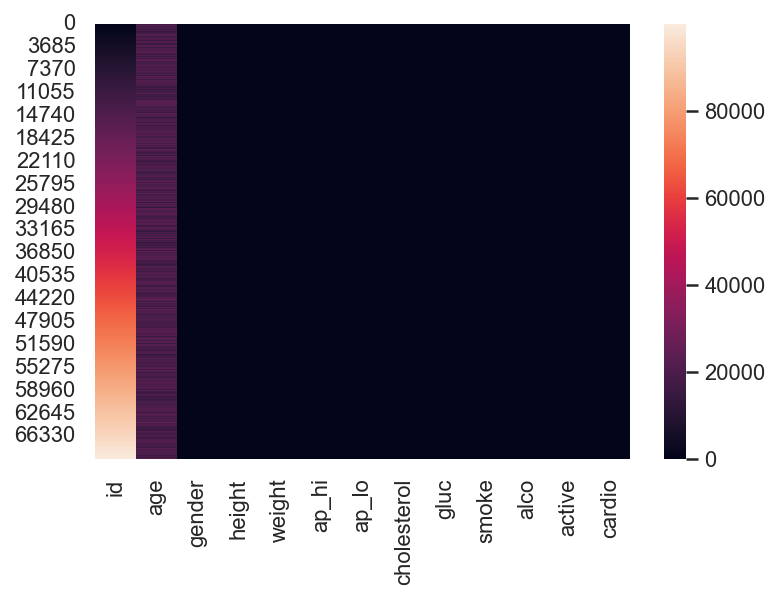

In [123]:
sns.heatmap(data=filtered_df)

In [159]:
# Calculate the correlation matrix
df = filtered_df.copy()

In [126]:
corr = df.corr(method="pearson")

In [127]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<AxesSubplot:>

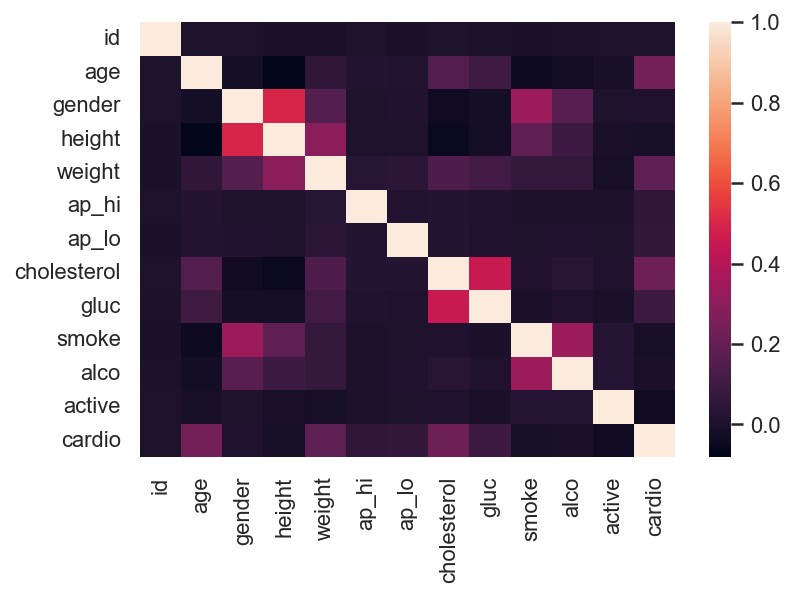

In [128]:
sns.heatmap(data=corr)

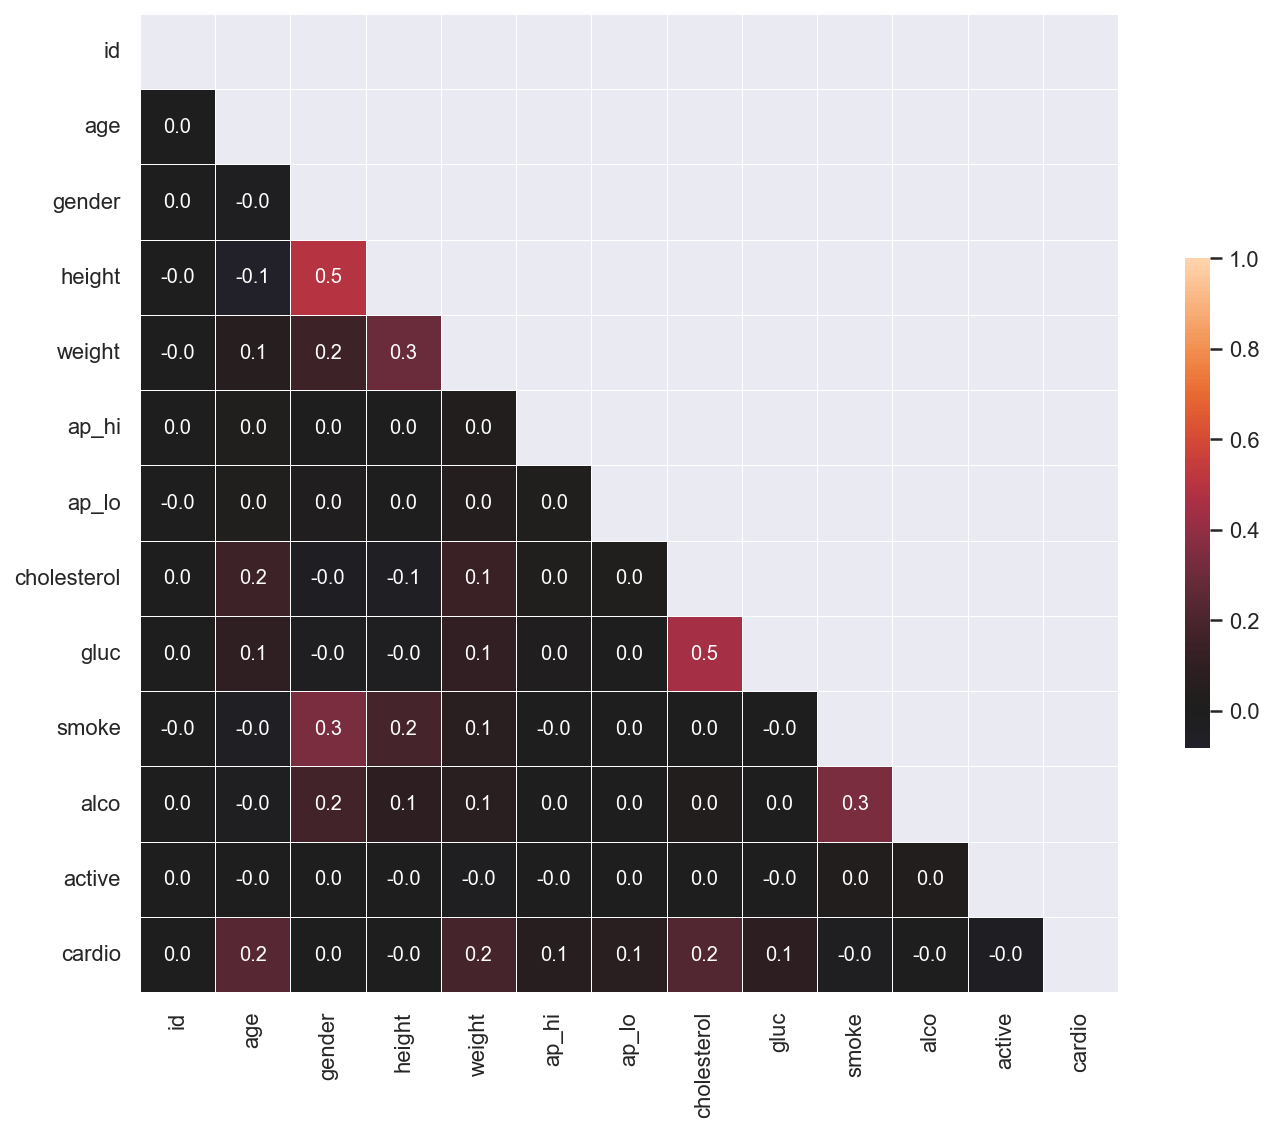

In [129]:
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

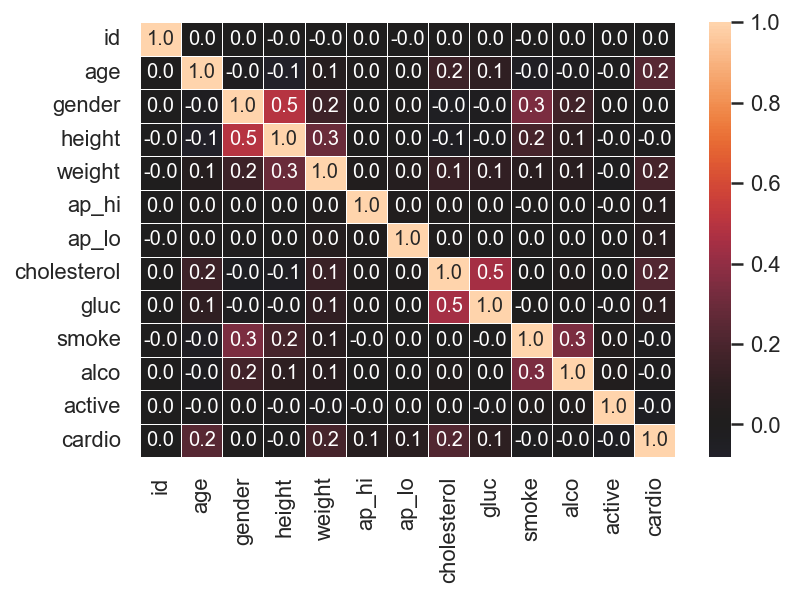

In [137]:
sns.heatmap(
    corr,
   
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
);

### Task:

Create a violin plot for the height and gender using violinplot(). Use the parameters:

- hue to split by gender;
- scale to evaluate the number of records for each gender.  

In order for the plot to render correctly, you need to convert your DataFrame to long format using the melt() function from pandas. Here is an example of this for your reference.




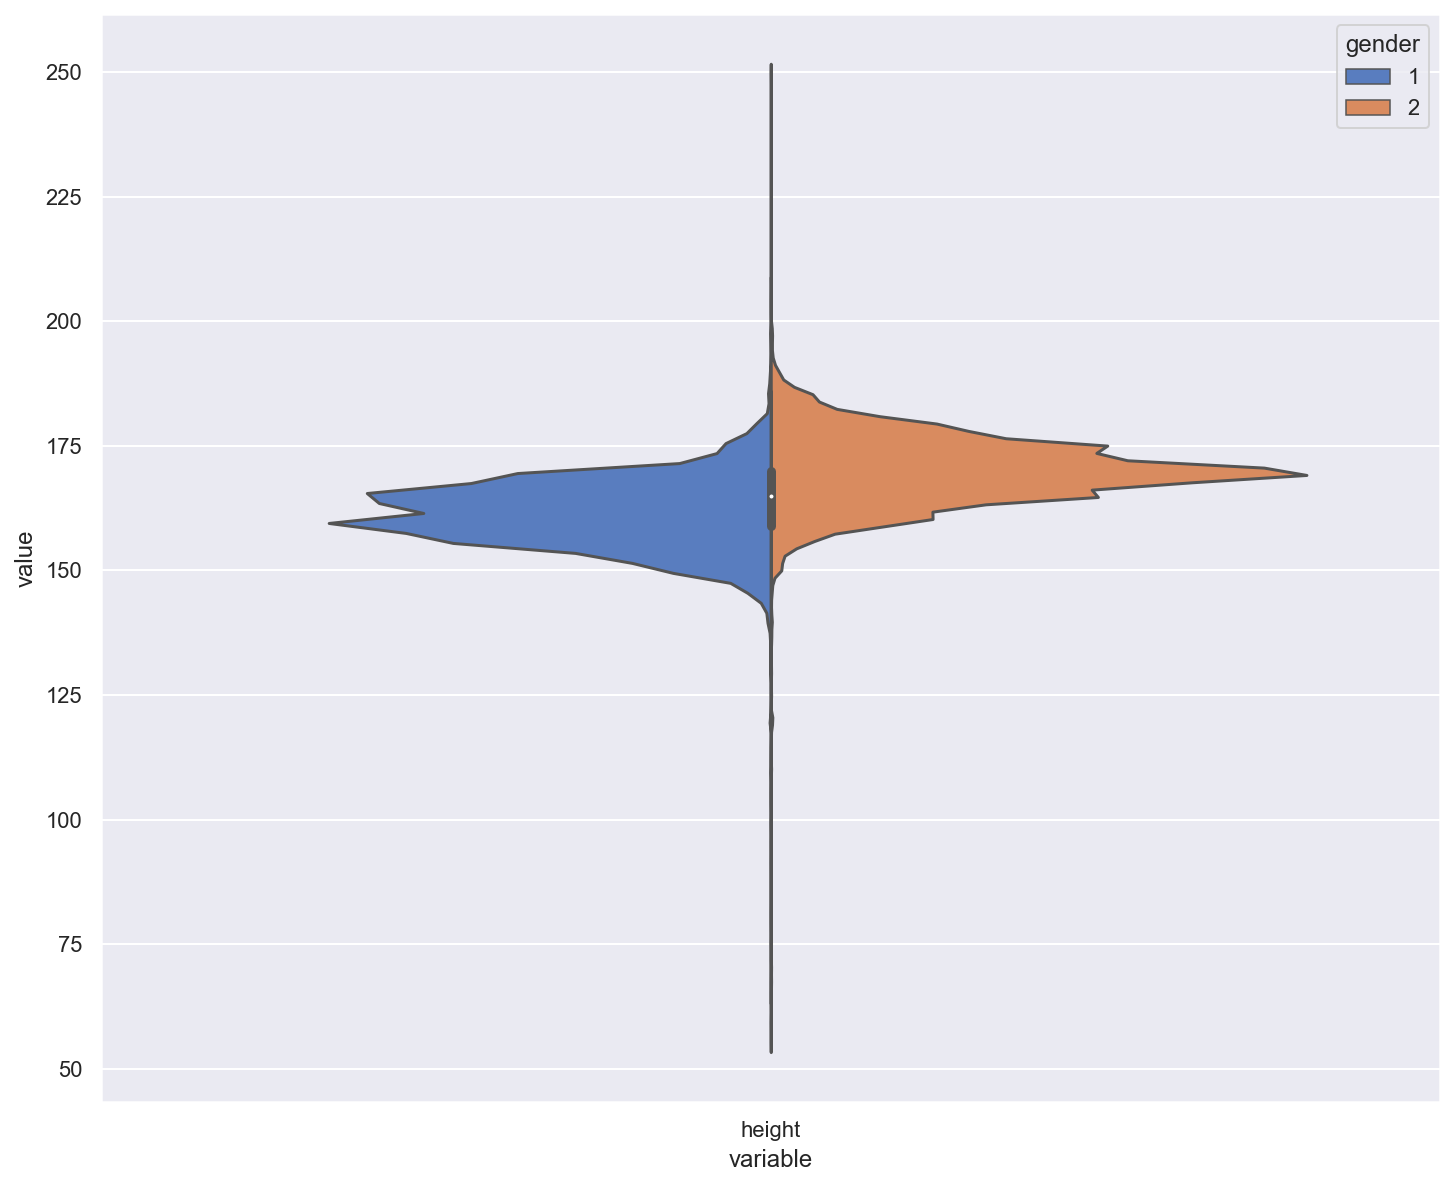

In [172]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
   
)

In [162]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

In [163]:
df_melt

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
69995,2,height,168
69996,1,height,158
69997,2,height,183
69998,1,height,163


In [161]:
df = filtered_df.copy()

### Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

- Height, Weight
- Age, Weight
- Cholesterol, Gluc
- Cardio, Cholesterol
- __Ap_hi, Ap_lo__
- Smoke, Alco

In [174]:
df = filtered_df.copy()
corr_spearmen = df.corr('spearman')

<AxesSubplot:>

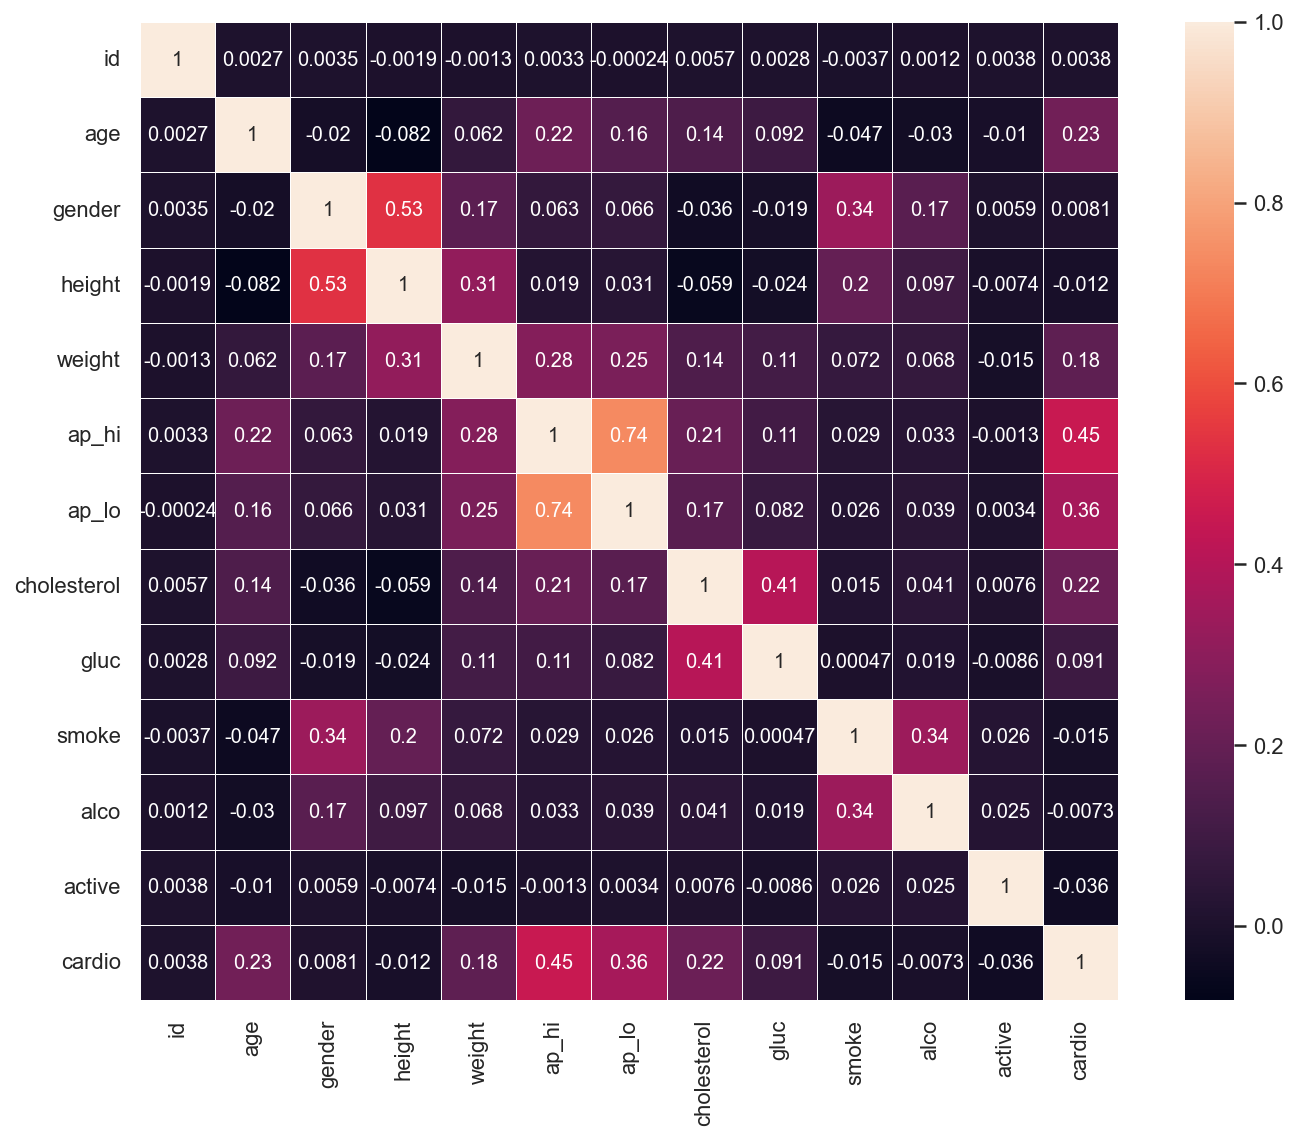

In [178]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data=corr_spearmen,
            linewidths=0.5,
            annot=True,
            square=True,
            vmax=1,
            
           )

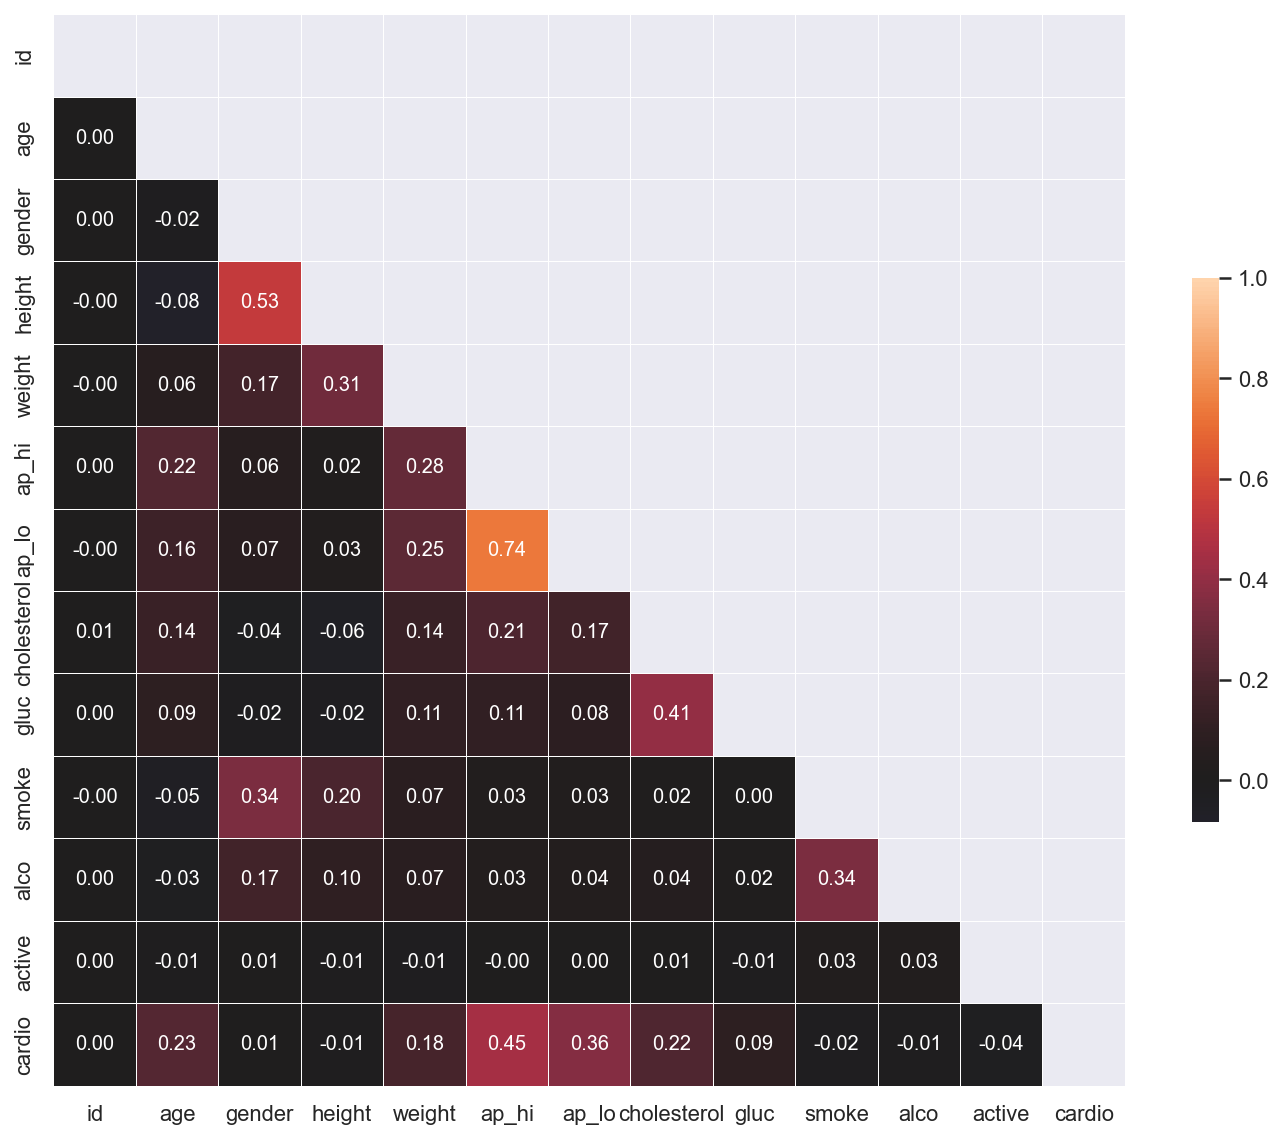

In [180]:
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);




### Question 2.3. (1 point). Why does these features have strong rank correlation?

- Inaccuracies in the data (data acquisition errors).
- Relation is wrong, these features should not be related.
- __Nature of the data__.


### Task:

Create a count plot using countplot(), with the age on the X axis and the number of people on the Y axis. Each value of the age should have two columns corresponding to the numbers of people of this age for each cardio class.

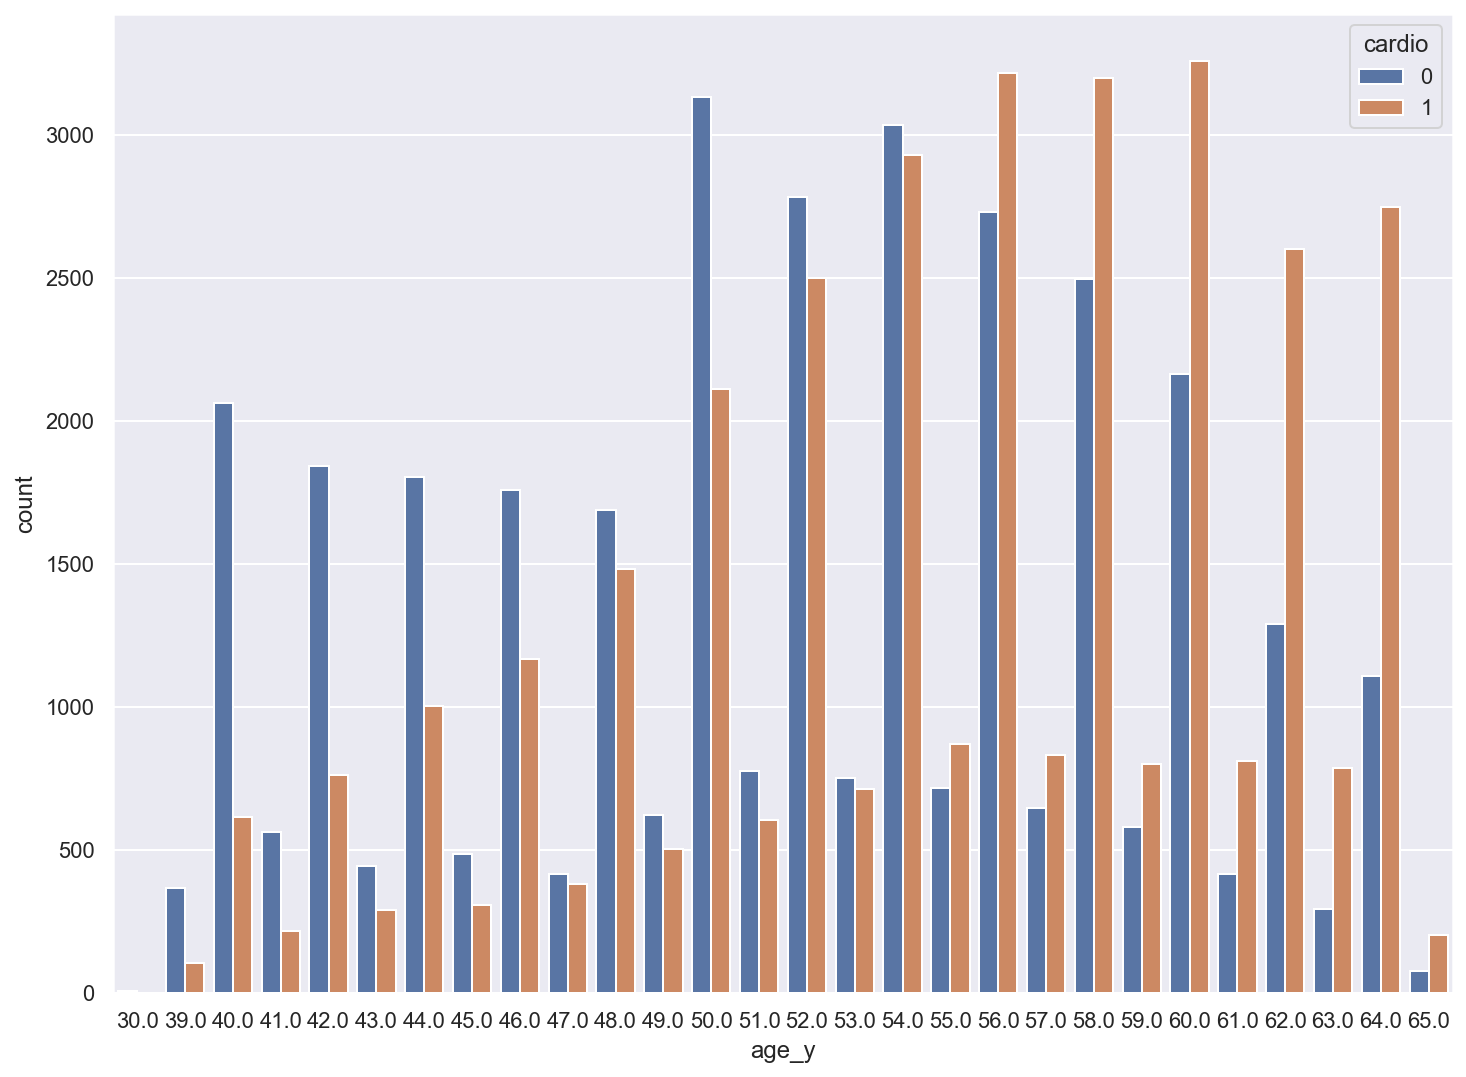

In [188]:
f, ax = plt.subplots(figsize=(12, 9))
sns.countplot(data=df, x='age_y', hue='cardio');

### Question 2.4. (1 point). At what age does the number of people with CVD outnumber the number of people without CVD for the first time?

- 44
- __55__
- 64
- 70